<a href="https://colab.research.google.com/github/trishvilladiego/CSST106-CS4A/blob/main/4A-VILLADIEGO-MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing Techniques using OpenCV**

# **Install necessary libraries**

In [ ]:
# Install necessary libraries
!pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO
from PIL import Image

In [ ]:
# Function to display an image using matplotlib
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')
    plt.show()

# **Upload Images**

In [ ]:
# Upload images
print("Please select two images to upload.")
uploaded = files.upload()  # Upload multiple images

# Check if two images were uploaded
if len(uploaded) != 2:
    print("Error: Please upload exactly two images.")
    exit()

Please select two images to upload.


Saving 0fe678edae66c16210e5f974d8d99f4b.jpg to 0fe678edae66c16210e5f974d8d99f4b.jpg
Saving c1c6b990fc68599a452d0bad0d5693db.jpg to c1c6b990fc68599a452d0bad0d5693db.jpg


# **Display Images**

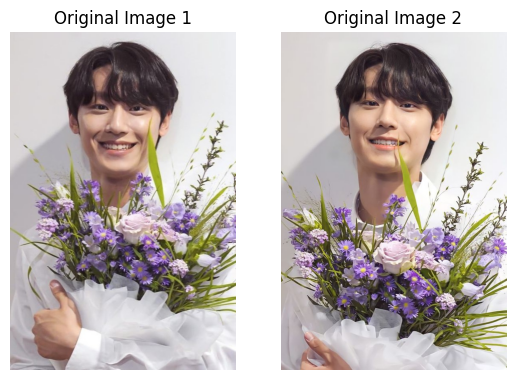

In [ ]:
# Load the two images from the uploaded files
image_paths = list(uploaded.keys())  # Get the image file names
image1 = Image.open(BytesIO(uploaded[image_paths[0]]))
image2 = Image.open(BytesIO(uploaded[image_paths[1]]))

# Convert images to OpenCV format (BGR)
image1 = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)
image2 = cv2.cvtColor(np.array(image2), cv2.COLOR_RGB2BGR)

# Display the original images
display_images(image1, image2, "Original Image 1", "Original Image 2")

# **Scaling Transformation**

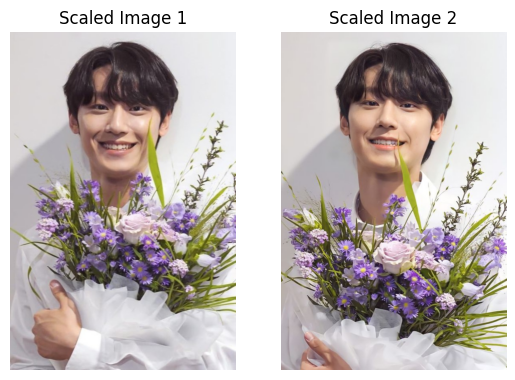

In [ ]:
# Scaling Transformation
def scale_image(image, scale_x=1.5, scale_y=1.5):
    """
    Scales the input image by the specified factors along the x and y axes.

    Parameters:
    - image: The input image to be scaled.
    - scale_x: The scaling factor along the x-axis (default is 1.5).
    - scale_y: The scaling factor along the y-axis (default is 1.5).

    Returns:
    - scaled_image: The scaled version of the input image.
    """
    scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled_image

# Apply scaling transformation to both images
scaled1 = scale_image(image1)
scaled2 = scale_image(image2)

# Display both scaled images in one spot
display_images(scaled1, scaled2, "Scaled Image 1", "Scaled Image 2")

# **Rotation Transformation**

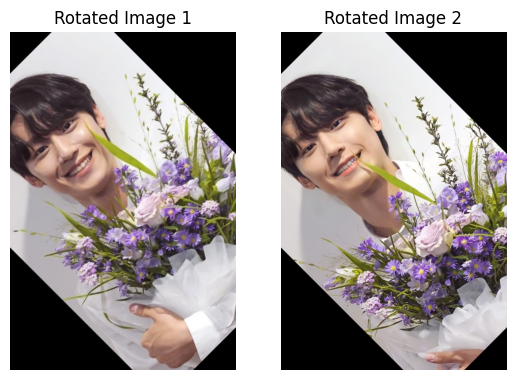

In [ ]:
# Rotation Transformation
def rotate_image(image, angle=45):
    """
    Rotates the input image around its center by a specified angle.

    Parameters:
    - image: The input image to be rotated.
    - angle: The rotation angle in degrees (default is 45).

    Returns:
    - rotated_image: The rotated version of the input image.
    """
    height, width = image.shape[:2]
    center = (width // 2, height // 2)  # Find the center of the image
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Create the rotation matrix
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))  # Apply the rotation
    return rotated_image

# Apply rotation transformation to both images
rotated1 = rotate_image(image1)  # Rotate the first scaled image
rotated2 = rotate_image(image2)  # Rotate the second scaled image

# Display both rotated images side by side
display_images(rotated1, rotated2, "Rotated Image 1", "Rotated Image 2")

# **Blurring (Filtering)**

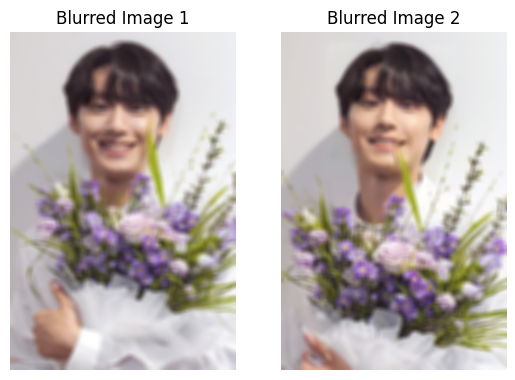

In [ ]:
# Blurring (Filtering)
def blur_image(image, kernel_size=(15, 15), sigma=10):
    """
    Applies a Gaussian blur to the input image using the specified kernel size and sigma.

    Parameters:
    - image: The input image to be blurred.
    - kernel_size: The size of the Gaussian kernel (default is (15, 15)).
    - sigma: The standard deviation of the Gaussian kernel (default is 10).

    Returns:
    - blurred_image: The blurred version of the input image.
    """
    # Apply Gaussian Blur with an adjustable kernel size and sigma
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)
    return blurred_image

# Apply blurring transformation to both images
blurred1 = blur_image(image1)  # Blur the first image
blurred2 = blur_image(image2)  # Blur the second image

# Display both blurred images side by side
display_images(blurred1, blurred2, "Blurred Image 1", "Blurred Image 2")

# **Edge Detection**

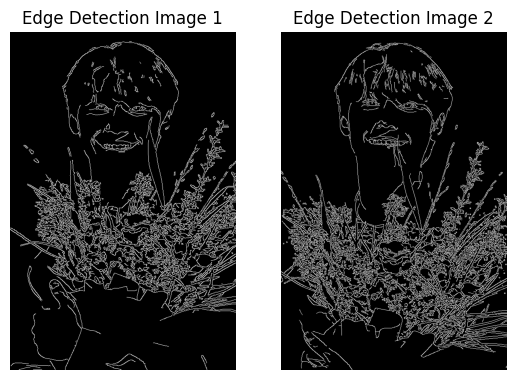

In [ ]:
# Edge Detection
def detect_edges(image, threshold1=100, threshold2=200):
    """
    Detects edges in the input image using the Canny edge detection algorithm.

    Parameters:
    - image: The input image for edge detection.
    - threshold1: The first threshold for the hysteresis procedure (default is 100).
    - threshold2: The second threshold for the hysteresis procedure (default is 200).

    Returns:
    - edges: An image with edges highlighted.
    """
    edges = cv2.Canny(image, threshold1, threshold2)
    return edges

# Apply edge detection transformation to both images
edges1 = detect_edges(image1)  # Detect edges on the first blurred image
edges2 = detect_edges(image2)  # Detect edges on the second blurred image

# Display both edge-detected images side by side
display_images(edges1, edges2, "Edge Detection Image 1", "Edge Detection Image 2")

# **Display all the output of Different Techniques of Image Processing**

All outputs for Image 1:


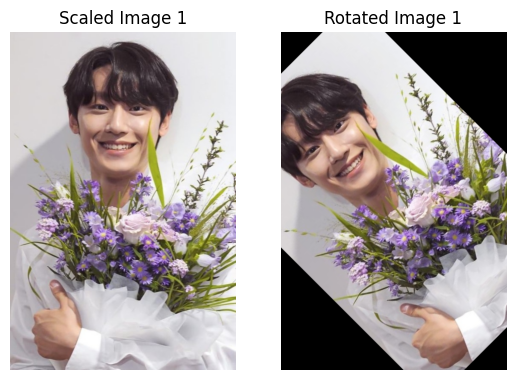

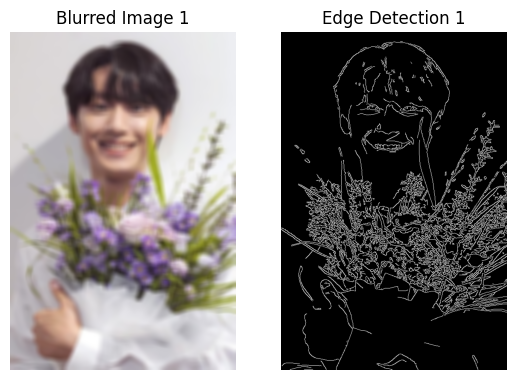

All outputs for Image 2:


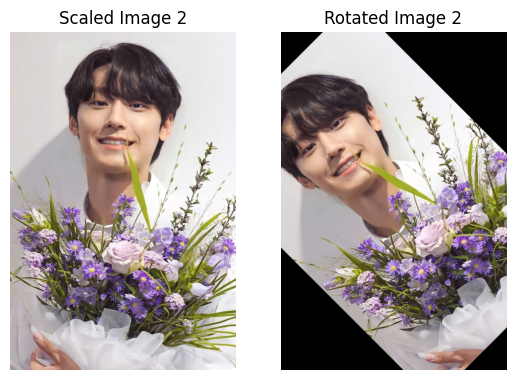

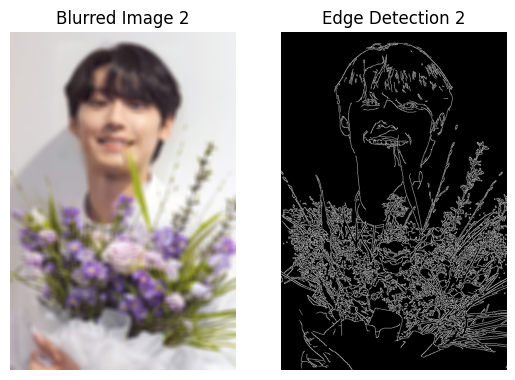

In [ ]:
# Display all outputs of Image 1 at once
print("All outputs for Image 1:")
display_images(scaled1, rotated1, "Scaled Image 1", "Rotated Image 1")
display_images(blurred1, edges1, "Blurred Image 1", "Edge Detection 1")

# Display all outputs of Image 2 at once
print("All outputs for Image 2:")
display_images(scaled2, rotated2, "Scaled Image 2", "Rotated Image 2")
display_images(blurred2, edges2, "Blurred Image 2", "Edge Detection 2")